Demo for running BookNLP on an input text.  To use a GPU in Google Colab, change the following:

`Runtime > Change runtime type > Hardware accelerator > GPU`

To execute this notebook, sign in to Google and then run all cells

`Runtime > Run all`

In [ ]:
!pip install booknlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.4 MB/s eta 0:00:00
  Created wheel for booknlp: filename=booknlp-1.0.7.1-py3-none-any.whl size=2420755 sha256=dc4ddecbeb3f627732d3c0e017bbeab8eb409fa49d978ceae40ce58cd6c0ed7d
  Stored in directory: /root/.cache/pip/wheels/df/ff/8e/1f89ef31c774bc2e8a883009b1c8b88fc4544f6531ab83009b
Successfully built booknlp
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
!wget https://www.gutenberg.org/files/208/208.txt -O 208_daisy_miller.txt

--2023-12-23 19:34:53--  https://www.gutenberg.org/files/208/208.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144615 (141K) [text/plain]
Saving to: ‘208_daisy_miller.txt’

208_daisy_miller.tx 100%[===================>] 141.23K  --.-KB/s    in 0.08s   

2023-12-23 19:34:53 (1.80 MB/s) - ‘208_daisy_miller.txt’ saved [144615/144615]



In [ ]:
!python -m spacy download en_core_web_sm

2023-12-23 19:35:01.568434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 19:35:01.568507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 19:35:01.570415: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 19:35:01.581684: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-23 19:35:03.788128: W tensorflow/compiler/tf2

In [ ]:
from booknlp.booknlp import BookNLP
import pandas as pd

using device cuda


In [ ]:
model_params={
		"pipeline":"entity,quote,supersense,event,coref",
		"model":"big",
	}

booknlp=BookNLP("en", model_params)

{'pipeline': 'entity,quote,supersense,event,coref', 'model': 'big'}
downloading entities_google_bert_uncased_L-6_H-768_A-12-v1.0.model
downloading coref_google_bert_uncased_L-12_H-768_A-12-v1.0.model
downloading speaker_google_bert_uncased_L-12_H-768_A-12-v1.0.1.model


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/270M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

--- startup: 39.220 seconds ---


In [ ]:
def get_input(input_file):
  inputFile= input_file
  outputDir="outputdir/"
  idd="output"

  booknlp.process(inputFile, outputDir, idd)
get_input("folk_tale.txt")

FileNotFoundError: ignored

In [ ]:
import json
from collections import Counter

In [ ]:
def proc(filename):
    with open(filename) as file:
        data=json.load(file)
    return data

In [ ]:
data=proc("outputdir/output.book")
with open ("outputdir/output.book", "r") as f:
    book_data = json.load(f)
book_data.keys()
book_data['characters'][0]['g']

{'inference': {'he/him/his': 0.063,
  'she/her': 0.014,
  'they/them/their': 0.894,
  'xe/xem/xyr/xir': 0.014,
  'ze/zem/zir/hir': 0.014},
 'argmax': 'they/them/their',
 'max': 0.894,
 'total': 6.916}

In [ ]:
tokens = pd.read_csv('outputdir/output.book', delimiter='/t')

<ipython-input-28-6da4d9780056>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tokens = pd.read_csv('outputdir/output.book', delimiter='/t')


In [ ]:
def get_counter_from_dependency_list(dep_list):
    counter=Counter()
    for token in dep_list:
        term=token["w"]
        tokenGlobalIndex=token["i"]
        counter[term]+=1
    return counter

In [ ]:
def create_character_data(data, printTop):
    character_data = {}
    for character in data["characters"]:

        agentList=character["agent"]
        patientList=character["patient"]
        possList=character["poss"]
        modList=character["mod"]

        character_id=character["id"]
        count=character["count"]

        referential_gender_distribution=referential_gender_prediction="unknown"

        if character["g"] is not None and character["g"] != "unknown":
            referential_gender_distribution=character["g"]["inference"]
            referential_gender=character["g"]["argmax"]

        mentions=character["mentions"]
        proper_mentions=mentions["proper"]
        max_proper_mention=""

        #Let's create some empty lists that we can append to.
        poss_items = []
        agent_items = []
        patient_items = []
        mod_items = []

        # just print out information about named characters
        if len(mentions["proper"]) > 0:
            max_proper_mention=mentions["proper"][0]["n"]
            for k, v in get_counter_from_dependency_list(possList).most_common(printTop):
                poss_items.append((v,k))

            for k, v in get_counter_from_dependency_list(agentList).most_common(printTop):
                agent_items.append((v,k))

            for k, v in get_counter_from_dependency_list(patientList).most_common(printTop):
                patient_items.append((v,k))

            for k, v in get_counter_from_dependency_list(modList).most_common(printTop):
                mod_items.append((v,k))




            # print(character_id, count, max_proper_mention, referential_gender)
            character_data[character_id] = {"id": character_id,
                                  "count": count,
                                  "max_proper_mention": max_proper_mention,
                                  "referential_gender": referential_gender,
                                  "possList": poss_items,
                                  "agentList": agent_items,
                                  "patientList": patient_items,
                                  "modList": mod_items
                                 }
    return character_data
c = create_character_data(data,20)
c

{3: {'id': 3,
  'count': 29,
  'max_proper_mention': 'Momotaro',
  'referential_gender': 'they/them/their',
  'possList': [(1, 'Momotaro')],
  'agentList': [(8, 'says'),
   (3, '’m'),
   (3, 'gave'),
   (3, 'jogged'),
   (2, 'go'),
   (1, 'cries'),
   (1, 'going'),
   (1, 'obliged'),
   (1, '’ve')],
  'patientList': [(1, 'cried')],
  'modList': [(1, 'man!”“Mother')]},
 7: {'id': 7,
  'count': 5,
  'max_proper_mention': 'the Ogres',
  'referential_gender': 'he/him/his',
  'possList': [(1, 'treasure')],
  'agentList': [],
  'patientList': [(1, 'peck'), (1, 'pinch'), (1, 'bite'), (1, 'fight')],
  'modList': []},
 5: {'id': 5,
  'count': 3,
  'max_proper_mention': 'Ken',
  'referential_gender': 'he/him/his',
  'possList': [],
  'agentList': [(1, 'said'), (1, 'says')],
  'patientList': [],
  'modList': []},
 6: {'id': 6,
  'count': 2,
  'max_proper_mention': 'Momotaro?”“I’ve',
  'referential_gender': 'he/him/his',
  'possList': [],
  'agentList': [(2, 'got')],
  'patientList': [],
  'modLis

In [ ]:
import csv

def dict_to_csv(dictionary, file_path):
    with open(file_path, 'a', newline='') as csv_file:  # Change 'w' to 'a'
        writer = csv.writer(csv_file)

        # Check if the file is empty, and write header only if it is
        if csv_file.tell() == 0:
            writer.writerow(dictionary.keys())

        for row in zip(*dictionary.values()):
            writer.writerow(row)


In [ ]:
tales_csv = pd.read_csv('tales.csv')
def read_book(text, file_path):
  with open(file_path, 'w') as file:
          file.write(text)

  get_input("folk_tale.txt")
  data=proc("outputdir/output.book")
  with open ("outputdir/output.book", "r") as f:
      book_data = json.load(f)

  book_data['characters'][0]['g']
  character_data = create_character_data(data,20)

  csv_data = {'Name': [],
        'Gender': [],
        'Agent': [],
        'Patient': [],
        'FolkTale': []}

  for i in character_data:
    agents = character_data[i]["agentList"]
    patients = character_data[i]['patientList']
    name = character_data[i]['max_proper_mention']
    gender = character_data[i]['referential_gender']
    tale_name = title
    csv_data['Name'].append(name)
    csv_data['Gender'].append(gender)
    csv_data['Agent'].append(agents)
    csv_data['Patient'].append(patients)
    csv_data['FolkTale'].append(tale_name)

  dict_to_csv(csv_data, 'test.csv')
for i in range(len(tales_csv['text'])):
  text = tales_csv['text'][i]
  title = tales_csv['title'][i]
  read_book(text,"folk_tale.txt")

--- spacy: 0.139 seconds ---
--- entities: 5.843 seconds ---
--- quotes: 0.002 seconds ---
--- attribution: 25.450 seconds ---
--- name coref: 0.002 seconds ---
--- coref: 12.052 seconds ---
--- TOTAL (excl. startup): 43.501 seconds ---, 1321 words
--- spacy: 0.265 seconds ---
--- entities: 11.825 seconds ---
--- quotes: 0.011 seconds ---
--- attribution: 16.937 seconds ---
--- name coref: 0.003 seconds ---
--- coref: 17.547 seconds ---
--- TOTAL (excl. startup): 46.609 seconds ---, 2729 words
--- spacy: 0.045 seconds ---
--- entities: 1.688 seconds ---
--- quotes: 0.001 seconds ---
--- attribution: 1.187 seconds ---
--- name coref: 0.001 seconds ---
--- coref: 7.343 seconds ---
--- TOTAL (excl. startup): 10.271 seconds ---, 458 words
--- spacy: 0.485 seconds ---
--- entities: 20.442 seconds ---
--- quotes: 0.011 seconds ---
--- attribution: 7.891 seconds ---
--- name coref: 0.005 seconds ---
--- coref: 29.310 seconds ---
--- TOTAL (excl. startup): 58.178 seconds ---, 4956 words
--- sp

In [ ]:
def find_verb_usage(data, analysis=["agent", "patient"]):
    new_analysis = []
    for item in analysis:
        if item == "agent":
            new_analysis.append("agentList")
        elif item == "patient":
            new_analysis.append("patientList")
    main_agents = {}
    main_patients = {}
    for character in character_data:
        temp_data = character_data[character]
        for item in new_analysis:
            for verb in temp_data[item]:
                verb = verb[1].lower()
                if item == "agentList":
                    if verb not in main_agents:
                        main_agents[verb] = [(character, temp_data["max_proper_mention"])]
                    else:
                        main_agents[verb].append((character, temp_data["max_proper_mention"]))
                elif item == "patientList":
                    if verb not in main_patients:
                        main_patients[verb] = [(character, temp_data["max_proper_mention"])]
                    else:
                        main_patients[verb].append((character, temp_data["max_proper_mention"]))
    verb_usage = {"agent": main_agents,
                 "patient": main_patients}
    return verb_usage

In [ ]:
character_data = create_character_data(data,20)
verb_data = find_verb_usage(data)
#Create male dictionaries
male_agents = {}
male_patients = {}
#Create female dictionaries
female_agents = {}
female_patients = {}
#Find and store male and female events
for i in character_data:
  if character_data[i]['referential_gender'] == 'he/him/his' or character_data[i]['referential_gender'] == "he/him":
    if len(character_data[i]['agentList']) > 0:
      male_agents[character_data[i]['agentList'][0][1]] = character_data[i]['agentList'][0][0]
    if len(character_data[i]['patientList']) > 0:
      male_patients[character_data[i]['patientList'][0][1]] = character_data[i]['patientList'][0][0]
  elif character_data[i]['referential_gender'] == "she/her/hers" or character_data[i]['referential_gender'] == "she/her":
    if len(character_data[i]['agentList']) > 0:
      female_agents[character_data[i]['agentList'][0][1]] = character_data[i]['agentList'][0][0]
    if len(character_data[i]['patientList']) > 0:
      female_patients[character_data[i]['patientList'][0][1]] = character_data[i]['patientList'][0][0]

In [ ]:
def compare_unigram_agents():
  #Create odds ratio dicts
  male_unigram_odds_ratio = {}
  female_unigram_odds_ratio = {}
  equal_unigram_odds_ratio = {}
  for i in male_agents:
    #Check for overlapping agents
    if i in female_agents:
      if male_agents[i] > female_agents[i]:
        male_unigram_odds_ratio[i] = male_agents[i] / female_agents[i]
      elif female_agents[i] > male_agents[i]:
        female_unigram_odds_ratio[i] = female_agents[i] / male_agents[i]
      else:
        equal_unigram_odds_ratio[i] = male_agents[i]
    else:
      male_unigram_odds_ratio[i] = male_agents[i]
  for i in female_agents:
    female_unigram_odds_ratio[i] = female_agents[i]
  return male_unigram_odds_ratio,female_unigram_odds_ratio, equal_unigram_odds_ratio
compare_unigram_agents()

def compare_unigram_patients():
  male_unigram_odds_ratio = {}
  female_unigram_odds_ratio = {}
  equal_unigram_odds_ratio = {}
  for i in male_patients:
    #Check for overlapping patients
    if i in female_patients:
      if male_patients[i] > female_patients[i]:
        male_unigram_odds_ratio[i] = male_patients[i] / female_patients[i]
      elif female_patients[i] > male_patients[i]:
        female_unigram_odds_ratio[i] = female_patients[i] / male_patients[i]
      else:
        equal_unigram_odds_ratio[i] = male_patients[i]
    else:
      male_unigram_odds_ratio[i] = male_patients[i]
  for i in female_patients:
    female_unigram_odds_ratio[i] = female_patients[i]
  return male_unigram_odds_ratio,female_unigram_odds_ratio, equal_unigram_odds_ratio
compare_unigram_patients()

({'betrothed': 1}, {'hated': 1, 'loved': 1}, {})

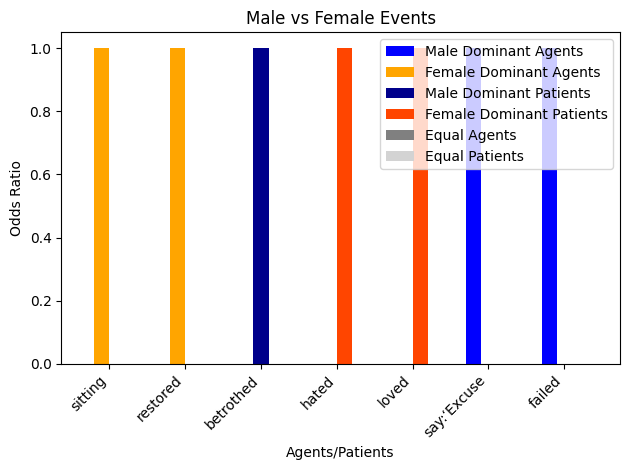

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_odds_ratios(male_agents, female_agents, equal_agents, male_patients, female_patients, equal_patients, title):
    fig, ax = plt.subplots()
    all_keys = set(male_agents.keys()) | set(female_agents.keys()) | set(equal_agents.keys()) | set(male_patients.keys()) | set(female_patients.keys()) | set(equal_patients.keys())
    #Plot agents
    male_agents_values = [male_agents.get(key, 0) for key in all_keys]
    female_agents_values = [female_agents.get(key, 0) for key in all_keys]
    equal_agents_values = [equal_agents.get(key, 0) for key in all_keys]
    #Plot patients
    male_patients_values = [male_patients.get(key, 0) for key in all_keys]
    female_patients_values = [female_patients.get(key, 0) for key in all_keys]
    equal_patients_values = [equal_patients.get(key, 0) for key in all_keys]

    bar_width = 0.2
    combined_indices = np.arange(len(all_keys))
    #Create bars
    ax.bar(combined_indices - bar_width, male_agents_values, width=bar_width, align='center', label='Male Dominant Agents', color='blue')
    ax.bar(combined_indices - bar_width, female_agents_values, width=bar_width, align='edge', label='Female Dominant Agents', color='orange')
    ax.bar(combined_indices, male_patients_values, width=bar_width, align='center', label='Male Dominant Patients', color='darkblue')
    ax.bar(combined_indices, female_patients_values, width=bar_width, align='edge', label='Female Dominant Patients', color='orangered')
    ax.bar(combined_indices + bar_width, equal_agents_values, width=bar_width, align='center', label='Equal Agents', color='gray')
    ax.bar(combined_indices + bar_width, equal_patients_values, width=bar_width, align='edge', label='Equal Patients', color='lightgray')
    ax.set_xticks(combined_indices)
    ax.set_xticklabels(all_keys, rotation=45, ha='right')
    #Create labels
    ax.set_xlabel('Agents/Patients')
    ax.set_ylabel('Odds Ratio')
    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.show()
male_agents, female_agents, equal_agents = compare_unigram_agents()
male_patients, female_patients, equal_patients = compare_unigram_patients()

plot_combined_odds_ratios(male_agents, female_agents, equal_agents, male_patients, female_patients, equal_patients, 'Male vs Female Events')

In [ ]:
from nltk import ngrams
from nltk.tokenize import word_tokenize

df_tokens = pd.read_csv('outputdir/output.tokens', delimiter="\t")
events = df_tokens[~df_tokens['event'].isnull()]
events

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
0,0,0,0,0,If,if,0,2,SCONJ,IN,mark,3,O
1,0,0,1,1,you,you,3,6,PRON,PRP,nsubj,3,O
2,0,0,2,2,’ll,’ll,6,9,AUX,MD,aux,3,O
3,0,0,3,3,believe,believe,10,17,VERB,VB,advcl,6,O
4,0,0,4,4,me,I,18,20,PRON,PRP,dobj,3,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0,88,3,1308,says,say,5430,5434,VERB,VBZ,ROOT,1308,EVENT
518,0,88,4,1309,the,the,5435,5438,DET,DT,det,1310,O
519,0,88,5,1310,dog,dog,5439,5442,NOUN,NN,nsubj,1308,O
520,0,88,6,1311,.,.,5442,5443,PUNCT,.,punct,1308,O


LookupError: ignored